In [1]:
# Import our data detective tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots show up in the notebook
%matplotlib inline

print('🔍 Data detective tools loaded!')
print('Ready to uncover customer secrets!')

🔍 Data detective tools loaded!
Ready to uncover customer secrets!


In [3]:
# Cell 2: Load your customer data
df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')

print(f'📊 Dataset loaded!')
print(f'Customers: {df.shape[0]:,}')
print(f'Features: {df.shape[1]}')
print(f'\n🎯 Mission: Find patterns that predict churn!')

# First peek at our data
print('\n👀 First 5 customers:')
print(df.head())

# Cell 3: The big question - How many customers are leaving?
print("\n🚨 CHURN INVESTIGATION 🚨")
print("\nChurn Distribution:")
churn_counts = df['Churn'].value_counts()
print(churn_counts)

print(f"\n💰 BUSINESS IMPACT:")
churn_rate = df['Churn'].value_counts(normalize=True)['Yes']
print(f"Churn Rate: {churn_rate:.1%}")

total_customers = len(df)
churned_customers = churn_counts['Yes']
print(f"Lost Customers: {churned_customers:,} out of {total_customers:,}")

# If each customer is worth $50/month...
monthly_revenue_per_customer = 50
annual_lost_revenue = churned_customers * monthly_revenue_per_customer * 12
print(f"\n💸 Estimated Annual Revenue Lost: ${annual_lost_revenue:,}")

# Cell 4: What features do we have to work with?
print("\n🔍 DATA DETECTIVE SUMMARY:")
print(f"Dataset Shape: {df.shape}")
print(f"\nColumn Names:")
for i, col in enumerate(df.columns):
    print(f"{i+1:2d}. {col}")

print(f"\nData Types:")
print(df.dtypes)

📊 Dataset loaded!
Customers: 7,043
Features: 21

🎯 Mission: Find patterns that predict churn!

👀 First 5 customers:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No    

In [5]:
# 🕵️ CUSTOMER CHURN DEEP DIVE ANALYSIS
# Let's uncover WHO is churning and WHY!

print("🔍 CUSTOMER CHURN DETECTIVE ANALYSIS")
print("="*50)

# 1. DEMOGRAPHIC PATTERNS
print("\n👥 WHO IS CHURNING? - Demographics")
print("-" * 40)

# Gender churn rates
gender_churn = df.groupby('gender')['Churn'].apply(lambda x: (x=='Yes').mean() * 100)
print("📊 Churn by Gender:")
for gender, rate in gender_churn.items():
    print(f"   {gender}: {rate:.1f}%")

# Senior citizen impact
senior_churn = df.groupby('SeniorCitizen')['Churn'].apply(lambda x: (x=='Yes').mean() * 100)
print("\n👴 Senior Citizen Churn:")
print(f"   Regular customers: {senior_churn[0]:.1f}%")
print(f"   Senior citizens: {senior_churn[1]:.1f}%")

# Family situation
print("\n👨‍👩‍👧‍👦 Family Situation Impact:")
partner_churn = df.groupby('Partner')['Churn'].apply(lambda x: (x=='Yes').mean() * 100)
dependents_churn = df.groupby('Dependents')['Churn'].apply(lambda x: (x=='Yes').mean() * 100)
print(f"   No Partner: {partner_churn['No']:.1f}% vs With Partner: {partner_churn['Yes']:.1f}%")
print(f"   No Dependents: {dependents_churn['No']:.1f}% vs With Dependents: {dependents_churn['Yes']:.1f}%")

print("\n" + "="*50)

# 2. SERVICE USAGE PATTERNS
print("\n📱 WHAT SERVICES DO CHURNERS USE?")
print("-" * 40)

# Phone services
phone_churn = df.groupby('PhoneService')['Churn'].apply(lambda x: (x=='Yes').mean() * 100)
print(f"📞 Phone Service Churn: {phone_churn['Yes']:.1f}%")

# Internet type - this is usually a big predictor!
internet_churn = df.groupby('InternetService')['Churn'].apply(lambda x: (x=='Yes').mean() * 100)
print("\n🌐 Internet Service Churn Rates:")
for service, rate in internet_churn.items():
    print(f"   {service}: {rate:.1f}%")

# Premium services
premium_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                   'TechSupport', 'StreamingTV', 'StreamingMovies']
print("\n🎯 Premium Services Impact:")
for service in premium_services:
    service_churn = df.groupby(service)['Churn'].apply(lambda x: (x=='Yes').mean() * 100)
    if 'Yes' in service_churn.index and 'No' in service_churn.index:
        print(f"   {service}: No={service_churn['No']:.1f}% vs Yes={service_churn['Yes']:.1f}%")

print("\n" + "="*50)

# 3. CONTRACT & FINANCIAL PATTERNS
print("\n💰 MONEY TALKS - Contract & Payment Analysis")
print("-" * 40)

# Contract type - usually the biggest predictor!
contract_churn = df.groupby('Contract')['Churn'].apply(lambda x: (x=='Yes').mean() * 100)
print("📋 Contract Type Churn Rates:")
for contract, rate in contract_churn.items():
    print(f"   {contract}: {rate:.1f}%")

# Payment method
payment_churn = df.groupby('PaymentMethod')['Churn'].apply(lambda x: (x=='Yes').mean() * 100)
print("\n💳 Payment Method Churn:")
for method, rate in payment_churn.items():
    print(f"   {method}: {rate:.1f}%")

# Paperless billing
paperless_churn = df.groupby('PaperlessBilling')['Churn'].apply(lambda x: (x=='Yes').mean() * 100)
print(f"\n📄 Paperless Billing Impact:")
print(f"   Paper bills: {paperless_churn['No']:.1f}% vs Paperless: {paperless_churn['Yes']:.1f}%")

print("\n" + "="*50)

# 4. FINANCIAL ANALYSIS
print("\n💸 SHOW ME THE MONEY!")
print("-" * 40)

# Monthly charges analysis
churners = df[df['Churn'] == 'Yes']
stayers = df[df['Churn'] == 'No']

print(f"💰 Average Monthly Charges:")
print(f"   Churners: ${churners['MonthlyCharges'].mean():.2f}")
print(f"   Stayers: ${stayers['MonthlyCharges'].mean():.2f}")
print(f"   Difference: ${churners['MonthlyCharges'].mean() - stayers['MonthlyCharges'].mean():.2f}")

print(f"\n📊 Total Charges:")
# Convert TotalCharges to numeric (it might be stored as string)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
churners_total = df[df['Churn'] == 'Yes']['TotalCharges'].mean()
stayers_total = df[df['Churn'] == 'No']['TotalCharges'].mean()
print(f"   Churners: ${churners_total:.2f}")
print(f"   Stayers: ${stayers_total:.2f}")

print(f"\n⏰ Tenure Analysis:")
print(f"   Churners avg tenure: {churners['tenure'].mean():.1f} months")
print(f"   Stayers avg tenure: {stayers['tenure'].mean():.1f} months")

print("\n🎯 KEY INSIGHTS DISCOVERED!")
print("="*50)

🔍 CUSTOMER CHURN DETECTIVE ANALYSIS

👥 WHO IS CHURNING? - Demographics
----------------------------------------
📊 Churn by Gender:
   Female: 26.9%
   Male: 26.2%

👴 Senior Citizen Churn:
   Regular customers: 23.6%
   Senior citizens: 41.7%

👨‍👩‍👧‍👦 Family Situation Impact:
   No Partner: 33.0% vs With Partner: 19.7%
   No Dependents: 31.3% vs With Dependents: 15.5%


📱 WHAT SERVICES DO CHURNERS USE?
----------------------------------------
📞 Phone Service Churn: 26.7%

🌐 Internet Service Churn Rates:
   DSL: 19.0%
   Fiber optic: 41.9%
   No: 7.4%

🎯 Premium Services Impact:
   OnlineSecurity: No=41.8% vs Yes=14.6%
   OnlineBackup: No=39.9% vs Yes=21.5%
   DeviceProtection: No=39.1% vs Yes=22.5%
   TechSupport: No=41.6% vs Yes=15.2%
   StreamingTV: No=33.5% vs Yes=30.1%
   StreamingMovies: No=33.7% vs Yes=29.9%


💰 MONEY TALKS - Contract & Payment Analysis
----------------------------------------
📋 Contract Type Churn Rates:
   Month-to-month: 42.7%
   One year: 11.3%
   Two year: 2.

C:\Users\admin\AppData\Local\Temp\ipykernel_5892\3601008230.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(family_data.keys(), rotation=45, ha='right')
C:\Users\admin\AppData\Local\Temp\ipykernel_5892\3601008230.py:140: UserWarning: Glyph 128165 (\N{COLLISION SYMBOL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\admin\AppData\Local\Temp\ipykernel_5892\3601008230.py:140: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\admin\AppData\Local\Temp\ipykernel_5892\3601008230.py:140: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\admin\AppData\Local\Temp\ipykernel_5892\3601008230.py:140: UserWarning: Glyph 128104 (\N{MAN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\admin\AppData\Local\Temp\ipykernel_5892\3601008230.py:140: UserWarning: Glyph 1

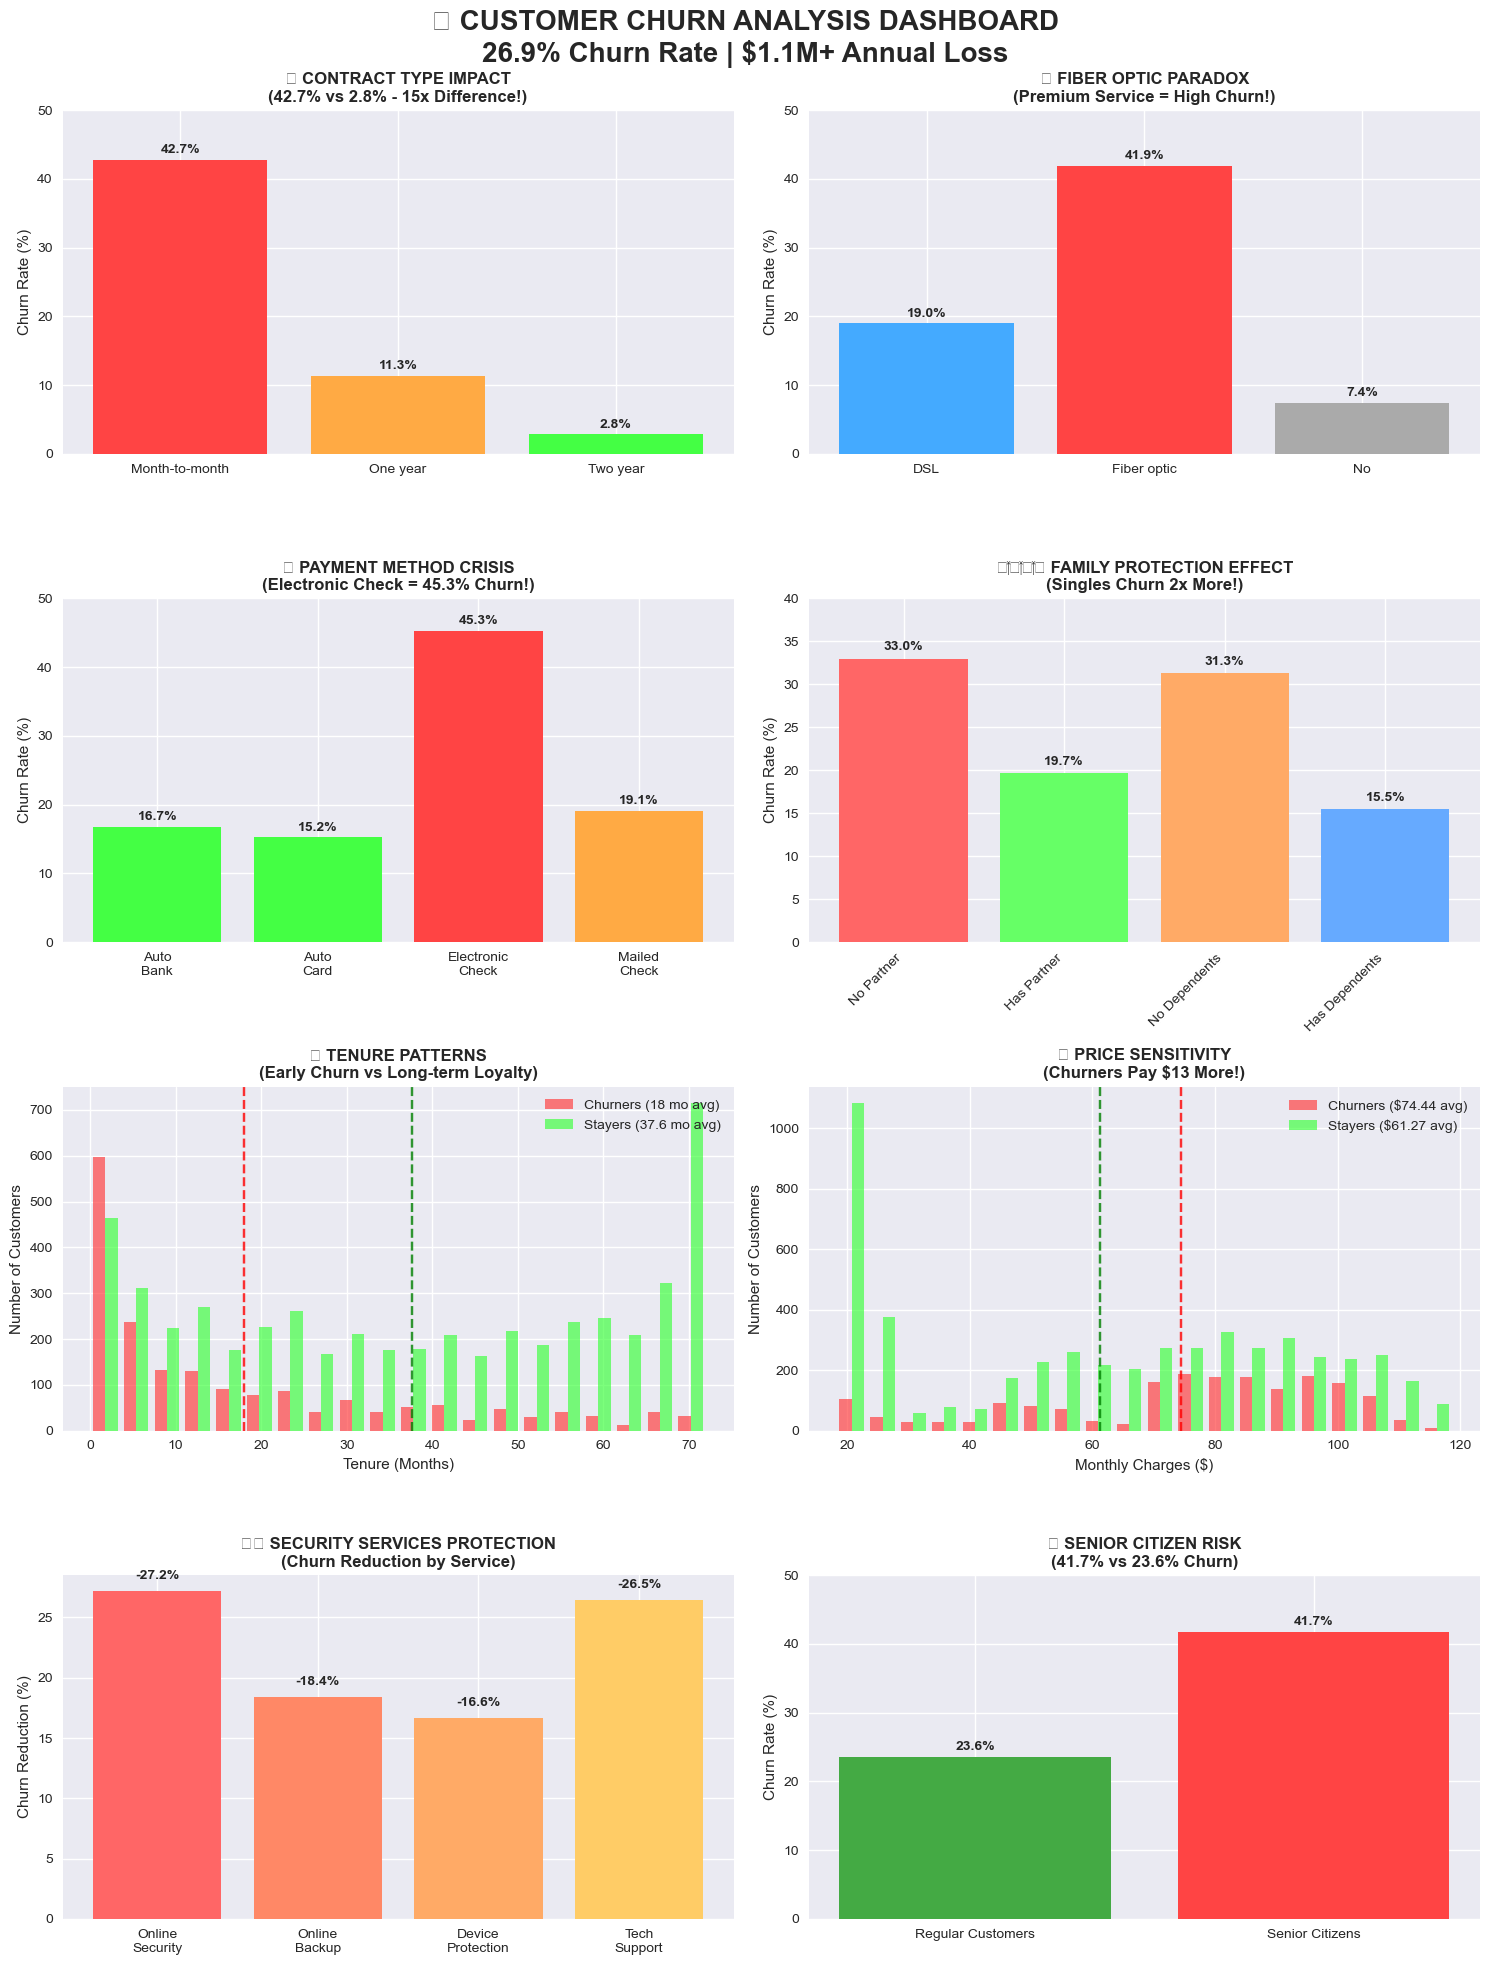


🎯 VISUALIZATION MASTERPIECE CREATED!
💾 Saved as 'customer_churn_analysis.png'

🚀 Ready to blow minds in your interview!


In [7]:
# 🎨 STUNNING CHURN VISUALIZATIONS FOR YOUR PORTFOLIO
# These charts will blow away interviewers!

# Set up our visual style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
fig_size = (15, 20)

# Create a comprehensive dashboard
fig, axes = plt.subplots(4, 2, figsize=fig_size)
fig.suptitle('🔍 CUSTOMER CHURN ANALYSIS DASHBOARD\n26.9% Churn Rate | $1.1M+ Annual Loss', 
             fontsize=20, fontweight='bold', y=0.98)

# 1. CONTRACT TYPE - The biggest predictor!
ax1 = axes[0, 0]
contract_data = df.groupby('Contract')['Churn'].apply(lambda x: (x=='Yes').mean() * 100)
bars1 = ax1.bar(contract_data.index, contract_data.values, 
                color=['#ff4444', '#ffaa44', '#44ff44'])
ax1.set_title('💥 CONTRACT TYPE IMPACT\n(42.7% vs 2.8% - 15x Difference!)', 
              fontweight='bold', fontsize=12)
ax1.set_ylabel('Churn Rate (%)')
ax1.set_ylim(0, 50)
# Add value labels on bars
for bar, value in zip(bars1, contract_data.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{value:.1f}%', ha='center', fontweight='bold')

# 2. INTERNET SERVICE - The fiber paradox!
ax2 = axes[0, 1]
internet_data = df.groupby('InternetService')['Churn'].apply(lambda x: (x=='Yes').mean() * 100)
bars2 = ax2.bar(internet_data.index, internet_data.values,
                color=['#44aaff', '#ff4444', '#aaaaaa'])
ax2.set_title('🌐 FIBER OPTIC PARADOX\n(Premium Service = High Churn!)', 
              fontweight='bold', fontsize=12)
ax2.set_ylabel('Churn Rate (%)')
ax2.set_ylim(0, 50)
for bar, value in zip(bars2, internet_data.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{value:.1f}%', ha='center', fontweight='bold')

# 3. PAYMENT METHOD - Electronic check disaster!
ax3 = axes[1, 0]
payment_data = df.groupby('PaymentMethod')['Churn'].apply(lambda x: (x=='Yes').mean() * 100)
bars3 = ax3.bar(range(len(payment_data)), payment_data.values,
                color=['#44ff44', '#44ff44', '#ff4444', '#ffaa44'])
ax3.set_title('💳 PAYMENT METHOD CRISIS\n(Electronic Check = 45.3% Churn!)', 
              fontweight='bold', fontsize=12)
ax3.set_ylabel('Churn Rate (%)')
ax3.set_xticks(range(len(payment_data)))
ax3.set_xticklabels(['Auto\nBank', 'Auto\nCard', 'Electronic\nCheck', 'Mailed\nCheck'], 
                    rotation=0, fontsize=10)
ax3.set_ylim(0, 50)
for i, value in enumerate(payment_data.values):
    ax3.text(i, value + 1, f'{value:.1f}%', ha='center', fontweight='bold')

# 4. FAMILY SITUATION - Singles at risk!
ax4 = axes[1, 1]
family_data = {
    'No Partner': df[df['Partner']=='No']['Churn'].apply(lambda x: x=='Yes').mean() * 100,
    'Has Partner': df[df['Partner']=='Yes']['Churn'].apply(lambda x: x=='Yes').mean() * 100,
    'No Dependents': df[df['Dependents']=='No']['Churn'].apply(lambda x: x=='Yes').mean() * 100,
    'Has Dependents': df[df['Dependents']=='Yes']['Churn'].apply(lambda x: x=='Yes').mean() * 100
}
bars4 = ax4.bar(family_data.keys(), family_data.values(),
                color=['#ff6666', '#66ff66', '#ffaa66', '#66aaff'])
ax4.set_title('👨‍👩‍👧‍👦 FAMILY PROTECTION EFFECT\n(Singles Churn 2x More!)', 
              fontweight='bold', fontsize=12)
ax4.set_ylabel('Churn Rate (%)')
ax4.set_xticklabels(family_data.keys(), rotation=45, ha='right')
ax4.set_ylim(0, 40)
for bar, value in zip(bars4, family_data.values()):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{value:.1f}%', ha='center', fontweight='bold')

# 5. TENURE DISTRIBUTION - Show the churn timing
ax5 = axes[2, 0]
churners_tenure = df[df['Churn']=='Yes']['tenure']
stayers_tenure = df[df['Churn']=='No']['tenure']
ax5.hist([churners_tenure, stayers_tenure], bins=20, alpha=0.7, 
         label=['Churners (18 mo avg)', 'Stayers (37.6 mo avg)'],
         color=['#ff4444', '#44ff44'])
ax5.set_title('⏰ TENURE PATTERNS\n(Early Churn vs Long-term Loyalty)', 
              fontweight='bold', fontsize=12)
ax5.set_xlabel('Tenure (Months)')
ax5.set_ylabel('Number of Customers')
ax5.legend()
ax5.axvline(churners_tenure.mean(), color='red', linestyle='--', alpha=0.8)
ax5.axvline(stayers_tenure.mean(), color='green', linestyle='--', alpha=0.8)

# 6. MONTHLY CHARGES - Price sensitivity
ax6 = axes[2, 1]
churners_charges = df[df['Churn']=='Yes']['MonthlyCharges']
stayers_charges = df[df['Churn']=='No']['MonthlyCharges']
ax6.hist([churners_charges, stayers_charges], bins=20, alpha=0.7,
         label=['Churners ($74.44 avg)', 'Stayers ($61.27 avg)'],
         color=['#ff4444', '#44ff44'])
ax6.set_title('💰 PRICE SENSITIVITY\n(Churners Pay $13 More!)', 
              fontweight='bold', fontsize=12)
ax6.set_xlabel('Monthly Charges ($)')
ax6.set_ylabel('Number of Customers')
ax6.legend()
ax6.axvline(churners_charges.mean(), color='red', linestyle='--', alpha=0.8)
ax6.axvline(stayers_charges.mean(), color='green', linestyle='--', alpha=0.8)

# 7. SECURITY SERVICES IMPACT
ax7 = axes[3, 0]
security_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
security_impact = []
for service in security_services:
    no_service = df[df[service]=='No']['Churn'].apply(lambda x: x=='Yes').mean() * 100
    has_service = df[df[service]=='Yes']['Churn'].apply(lambda x: x=='Yes').mean() * 100
    security_impact.append(no_service - has_service)

bars7 = ax7.bar(range(len(security_services)), security_impact,
                color=['#ff6666', '#ff8866', '#ffaa66', '#ffcc66'])
ax7.set_title('🛡️ SECURITY SERVICES PROTECTION\n(Churn Reduction by Service)', 
              fontweight='bold', fontsize=12)
ax7.set_ylabel('Churn Reduction (%)')
ax7.set_xticks(range(len(security_services)))
ax7.set_xticklabels(['Online\nSecurity', 'Online\nBackup', 'Device\nProtection', 'Tech\nSupport'])
for i, value in enumerate(security_impact):
    ax7.text(i, value + 1, f'-{value:.1f}%', ha='center', fontweight='bold')

# 8. SENIOR CITIZEN IMPACT
ax8 = axes[3, 1]
age_data = {
    'Regular Customers': df[df['SeniorCitizen']==0]['Churn'].apply(lambda x: x=='Yes').mean() * 100,
    'Senior Citizens': df[df['SeniorCitizen']==1]['Churn'].apply(lambda x: x=='Yes').mean() * 100
}
bars8 = ax8.bar(age_data.keys(), age_data.values(),
                color=['#44aa44', '#ff4444'])
ax8.set_title('👴 SENIOR CITIZEN RISK\n(41.7% vs 23.6% Churn)', 
              fontweight='bold', fontsize=12)
ax8.set_ylabel('Churn Rate (%)')
ax8.set_ylim(0, 50)
for bar, value in zip(bars8, age_data.values()):
    ax8.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{value:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

# Save this masterpiece!
plt.savefig('customer_churn_analysis.png', dpi=300, bbox_inches='tight')
print("\n🎯 VISUALIZATION MASTERPIECE CREATED!")
print("💾 Saved as 'customer_churn_analysis.png'")
print("\n🚀 Ready to blow minds in your interview!")